<a href="https://colab.research.google.com/github/ecrc/GMC-DL/blob/Yiping%2FCNN_Stationary_Classification/CNN_Model_Training_Upload_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="https://cemse.kaust.edu.sa/ecrc">
        <img src="https://user-images.githubusercontent.com/35196657/127348264-3e19521e-4833-4eaf-9d69-0cd60c98c06b.png" style="padding-bottom:5px;" />
      Visit ECRC at KAUST</a></td>
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ecrc/GMC-DL/blob/Yiping%2FCNN_Stationary_Classification/CNN_Model_Training_Upload_Version.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ecrc/GMC-DL/blob/Yiping/CNN_Stationary_Classification/CNN_Model_Training_Upload_Version.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

In [4]:
import numpy as np
import os
import sys
# import seaborn as sns
import matplotlib.pylab as plt
import math
from pathlib import Path # Python >= 3.5, for folder creation
import random # Random seed
from tqdm import tqdm # Progress bar in for loop
import pandas as pd
# Tensorflow
import tensorflow as tf

# from tensorflow.keras.layers import Dense, Flatten, Conv2D
# from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D
# from tensorflow.keras import Model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import to_categorical
from scipy.interpolate import NearestNDInterpolator

2023-03-29 15:38:05.899425: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


# Part 1: Data Preprocessing

In [5]:
# Input: Stationary and nonstationary generated data
#          Stationary files are located in directory_in_str_locs_stationary (locations) 
#          and directory_in_str_z_stationary (observed values)
# 
#          File names: LOC_3600_sample_1.txt, LOC_3600_sample_2.txt, ... (locations)
#                      Z_3600_sample_1.txt, Z_3600_sample_2.txt, ... (observed values)
# 
#          Format examples: 
#          LOC_3600_sample_1.txt:         Z_3600_sample_1.txt
#          0.012863,0.006928              1.264426
#          0.019715,0.003342              -0.526158
#          ...                            ...
# 
#          step_size: Step for jumping the plot. 
#                     When step_size = 10, the notebook plots preprocessed data for number 0, 10, 20, ...
# 
# Output: npz files containing preprocessed data inside save_data_string
#         plots of the preprocessed data inside save_fig_string

# Inputs

In [6]:
# Folder places and filenames
# Stationary
directory_in_str_locs_stationary = "stationary_data/"
directory_in_str_z_stationary = "stationary_data/"
locs_string_stationary = "LOC_" # LOC_3600_sample_1.txt, LOC_3600_sample_2.txt, ...
z_string_stationary = "Z1_" # Z_3600_sample_1.txt, Z_3600_sample_2.txt, ...
# Nonstationary
directory_in_str_locs_nonstationary = "nonstationary_data/"
directory_in_str_z_nonstationary = "nonstationary_data/"
locs_string_nonstationary = "LOC_"
z_string_nonstationary = "Z1_"

In [7]:
# Saving places
save_data_string = "Processed_Data/"
save_fig_string = "Processed_Data/Plots/"

In [8]:
# Saving names for the npz
npzfilename_stationary = "Dat_stationary_0413Pratik.npz";
npzfilename_nonstationary = "Dat_nonstationary_0413Pratik.npz";

In [9]:
# Step for jumping the plot. step_size=10: plot number 0, 10, 20, and so on. 
step_size = 1; # Step for jumping the plot. step_size=10: plot number 0, 10, 20, and so on. 

In [10]:
# Valid for both stationary and nonstationary data. 
# If the range of locations are determined manually
manual_range_locs = False
# If the range of observations are determined manually
manual_range_z = False

In [11]:
# Range of locations when manual_range_locs = True
if manual_range_locs == True:
    startx = 0
    endx = 1
    starty = 0
    endy = 1

In [12]:
# Range of observations when manual_range_z = True
if manual_range_z == True:
    m = 0
    M = 1 # The range of observations is [m, M]. 

# Statioanry data preprocessing

In [13]:
# Initialization 
# directory_in_str_locs = directory_in_str_locs_stationary
# directory_in_str_z = directory_in_str_z_stationary
# locs_string = locs_string_stationary
# z_string = z_string_stationary

In [14]:
# directory_locs = os.fsencode(directory_in_str_locs)
# data_folder1_locs = os.listdir(directory_locs)

In [15]:
# location_file_list = []
# Z_file_list = []
# for path, subdirs, files in os.walk(directory_locs):
#     for name in files:
#         name_string = name.decode("utf-8")
#         if name_string.startswith(locs_string): 
#             location_file_path = os.path.join(path, name)
#             location_file_path = location_file_path.decode("utf-8")
#             z_file_path = location_file_path.replace(locs_string, z_string, 1)
#             location_file_list.append(location_file_path)
#             Z_file_list.append(z_file_path)

In [16]:
# Folder places and filenames
# Stationary

location_file_list = [] # define if you donot want to have the true stationary regions for training
Z_file_list = []
directory_in_str_locs_stationary = "stationary_data/"
directory_in_str_z_stationary = "stationary_data/"
locs_string_stationary = "LOC_" # LOC_3600_sample_1.txt, LOC_3600_sample_2.txt, ...
z_string_stationary = "Z1_" # Z_3600_sample_1.txt, Z_3600_sample_2.txt, ...


# Initialization 
directory_in_str_locs = directory_in_str_locs_stationary
directory_in_str_z = directory_in_str_z_stationary
locs_string = locs_string_stationary
z_string = z_string_stationary

directory_locs = os.fsencode(directory_in_str_locs)
data_folder1_locs = os.listdir(directory_locs)


for path, subdirs, files in os.walk(directory_locs):
    for name in files:
        name_string = name.decode("utf-8")
        if name_string.startswith(locs_string): 
            location_file_path = os.path.join(path, name)
            location_file_path = location_file_path.decode("utf-8")
            z_file_path = location_file_path.replace(locs_string, z_string, 1)
            location_file_list.append(location_file_path)
            Z_file_list.append(z_file_path)


In [17]:
# loc_files is the file name for plotting. 
loc_files = []
for i in range(len(location_file_list)): 
    replace_res = location_file_list[i].replace(directory_in_str_locs, "")
    replace_res = replace_res.replace("\\", "_")
    loc_files.append(replace_res)

In [18]:
# Grid row and column
GRID_ROWS = 100
GRID_COLS = 100

# Initialization continued
ndata = len(location_file_list)
#ndata = 100 # Test
stationary_x_train = np.zeros((ndata,GRID_COLS,GRID_ROWS))

stationary_y_train = np.zeros(ndata) # Zero = the model is stationary. One = nonstationary. 

In [19]:
# Initialization continued
param_val_is_stat = 1;
npzfilename = npzfilename_stationary;

In [20]:
# Initialization continued
param_is_stat = np.ones(ndata)
#param_samplenum.fill(param_val_samplenum)
param_is_stat.fill(param_val_is_stat)

param_list = []

In [21]:
# http://127.0.0.1:10001/?token=9f1bcd66985a98609401a6f8285e6ed76d2757bd93346702

In [22]:
# plt.figure(figsize=(10,8))
# plt.imshow(Z1)
# plt.xticks([])
# plt.yticks([])
# plt.savefig('interpolated.png')

In [124]:
# n = 1040
# loc_text = location_file_list[n]
# z_text = Z_file_list[n]
# # Load the location and z files
# location_file = open(loc_text)
# Z_value_file = open(z_text)
# #     print(location_file)
# locations = np.loadtxt(location_file, delimiter=',')
# Z_values = np.loadtxt(Z_value_file, delimiter=',')

In [23]:
# Main program for data preprocessing
count = 0
for i_folder in tqdm(range(ndata)):
    # Append the parameter to samples. 
    param_dict = {
        "sample": i_folder,
        "is_stat": param_val_is_stat
    }
    param_list.append(param_dict)
    #==========
    # Data extraction
    #===========
    # Get location and observation files for each subsample
    loc_text = location_file_list[i_folder]
    z_text = Z_file_list[i_folder]
    # Load the location and z files
    location_file = open(loc_text)
    Z_value_file = open(z_text)
#     print(location_file)
    locations = np.loadtxt(location_file, delimiter=',')
    Z_values = np.loadtxt(Z_value_file, delimiter=',')
    #==========
    # End of data extraction
    #==========
    # Compute the output grid
    output_arr = np.zeros((GRID_ROWS,GRID_COLS))
    grid_sum_arr = np.zeros((GRID_ROWS,GRID_COLS))
    grid_div_arr = np.zeros((GRID_ROWS,GRID_COLS))
    if manual_range_locs == False:
        # Start and end locations (Auto)
#         print(locations[:,0],locations[:,1])
        startx = min(locations[:, 0])
        starty = min(locations[:, 1])
        endx = max(locations[:, 0])
        endy = max(locations[:, 1])
#     print(locations)
    locations[:,0] = (locations[:, 0] - startx)/(endx - startx)
    locations[:,1] = (locations[:, 1] - starty)/(endy - starty)
#     print(locations)
    startz = min(Z_values)
    endz = max(Z_values)
    if(abs(endz-startz) > 100):
        pass
    else:
        X = np.linspace(0, 1,GRID_COLS)
        Y = np.linspace(0, 1,GRID_ROWS)
        X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
        interp = NearestNDInterpolator(locations, Z_values)
        Z = interp(X, Y)
    #     break
    #     # Get the summation and division
    #     for j in range(locations.shape[0]):
    #         # Get the grid locations (x, y). Result: [y][x], because x is column (x=0 is the first column). 
    #         x = int(math.floor((locations[j][0] - startx) * GRID_COLS / (endx - startx)))
    #         y = int(math.floor((locations[j][1] - starty) * GRID_ROWS / (endy - starty)))
    #         # For boundary value problems
    #         x = min(x, GRID_COLS - 1)
    #         y = min(y, GRID_ROWS - 1)
    #         val = Z_values[j]
    #         # Add the summation and division
    #         grid_sum_arr[y][x] = grid_sum_arr[y][x] + val
    #         grid_div_arr[y][x] += 1
    #     # Generate output
    #     for j1 in range(GRID_ROWS):
    #         for j2 in range(GRID_COLS):
    #             if grid_div_arr[j1][j2] > 0:
    #                 # Mean value in a cell
    #                 output_arr[j1][j2] += (grid_sum_arr[j1][j2] / grid_div_arr[j1][j2])
    #             else:
    #                 # Mean value over all regions if the cell has no locations
    #                 output_arr[j1][j2] += np.mean(Z_values)
        if manual_range_z == False:
            # Normalize (Auto)
            m = np.min(Z)
            M = np.max(Z)
        if m == M:
            output_arr = np.ones((GRID_ROWS,GRID_COLS)) * 0.5 # All 0.5
        else: 
            # Range from 0 to 1. 
            Z = (Z - m) / (M - m)
        # Save results
        stationary_x_train[count] = Z
        count = count + 1

100%|██████████| 3428/3428 [06:46<00:00,  8.42it/s]


In [49]:
# location_file

<_io.TextIOWrapper name='stationary_subregion/stationary_data_1000/LOC_0' mode='r' encoding='UTF-8'>

In [50]:
# locations = np.loadtxt(location_file, delimiter=',')

/tmp/ipykernel_43727/1948567286.py:1: UserWarning: loadtxt: Empty input file: "<_io.TextIOWrapper name='stationary_subregion/stationary_data_1000/LOC_0' mode='r' encoding='UTF-8'>"
  locations = np.loadtxt(location_file, delimiter=',')


In [21]:
# stationary_x_train = stationary_x_train[:count,:,:]

In [24]:
count

3428

In [25]:
# Save to file
nparams = np.array(param_list)
Path(save_data_string).mkdir(parents=True, exist_ok=True)
np.savez( save_data_string + npzfilename, x = stationary_x_train, y = stationary_y_train, params = nparams)

In [24]:
# Path(save_fig_string).mkdir(parents=True, exist_ok=True)
# for i in tqdm(range(0 , len(loc_files) , int(step_size))):
# #for i in tqdm(range(0, 100, int(step_size))): 
#     plt.figure()
#     ax = sns.heatmap( stationary_x_train[i] , linewidth=0)
#     plt.savefig(save_fig_string + npzfilename + loc_files[i] +".png")
#     plt.close()

In [26]:
# sns.heatmap( stationary_x_train[120] , linewidth=0)

# Nonstationary data preprocessing

In [27]:
# Initialization 
directory_in_str_locs = directory_in_str_locs_nonstationary
directory_in_str_z = directory_in_str_z_nonstationary
locs_string = locs_string_nonstationary
z_string = z_string_nonstationary

In [28]:
directory_locs = os.fsencode(directory_in_str_locs)
data_files_locs = os.listdir(directory_locs)

In [29]:
location_file_list = []
Z_file_list = []
for path, subdirs, files in os.walk(directory_locs):
    for name in files:
        name_string = name.decode("utf-8")
        if name_string.startswith(locs_string): 
            location_file_path = os.path.join(path, name)
            location_file_path = location_file_path.decode("utf-8")
            z_file_path = location_file_path.replace(locs_string, z_string, 1)
            location_file_list.append(location_file_path)
            Z_file_list.append(z_file_path)

In [30]:
loc_files = []
for i in range(len(location_file_list)): 
    replace_res = location_file_list[i].replace(directory_in_str_locs, "")
    replace_res = replace_res.replace("\\", "_")
    loc_files.append(replace_res)

In [31]:
# Grid row and column
GRID_ROWS = 100
GRID_COLS = 100

# Initialization continued
ndata = len(loc_files)
#ndata = 100 # Test
nonstationary_x_train = np.zeros((ndata,GRID_COLS,GRID_ROWS))

nonstationary_y_train = np.ones(ndata) # Zero = the model is stationary. One = nonstationary. 

In [32]:
# Initialization continued
param_is_stat = np.ones(ndata)
#param_samplenum.fill(param_val_samplenum)
param_val_is_stat = 0; # Nonstationary. 
param_is_stat.fill(param_val_is_stat)

param_list = []

In [33]:
# Initialization continued
npzfilename = npzfilename_nonstationary;

In [34]:
ndata

4800

In [35]:
# Main program for data preprocessing
count = 0
for i_folder in tqdm(range(ndata)):
    # Append the parameter to samples. 
    param_dict = {
        "sample": i_folder,
        "is_stat": param_val_is_stat
    }
    param_list.append(param_dict)
    #==========
    # Data extraction
    #===========
    # Get paired location and observation files
#     print(loc_files[i])
    loc_text = loc_files[i_folder]
    z_text = loc_text.replace(locs_string, z_string, 1)
    # Load the location and z files
    location_file = open(directory_in_str_locs + loc_text)
    Z_value_file = open(directory_in_str_z + z_text)
    locations = np.loadtxt(location_file, delimiter=',')
    Z_values = np.loadtxt(Z_value_file, delimiter=',')
    #==========
    # End of data extraction
    #==========
    # Check if there is NaN value
    if any(np.isnan(Z_values)) == True:
        print("Warning: NaN values occur in i=", i, "; location file:", loc_text)
        Z_values[np.isnan(Z_values)] = 0
    # Compute the output grid
    output_arr = np.zeros((GRID_ROWS,GRID_COLS))
    grid_sum_arr = np.zeros((GRID_ROWS,GRID_COLS))
    grid_div_arr = np.zeros((GRID_ROWS,GRID_COLS))
    if manual_range_locs == False:
        # Start and end locations (Auto)
#         print(locations[:,0],locations[:,1])
        startx = min(locations[:, 0])
        starty = min(locations[:, 1])
        endx = max(locations[:, 0])
        endy = max(locations[:, 1])
#     print(locations)
    locations[:,0] = (locations[:, 0] - startx)/(endx - startx)
    locations[:,1] = (locations[:, 1] - starty)/(endy - starty)
#     print(locations)
    startz = min(Z_values)
    endz = max(Z_values)
    if(abs(endz-startz) > 100):
        pass
    else:
        X = np.linspace(0, 1,GRID_COLS)
        Y = np.linspace(0, 1,GRID_ROWS)
        X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
        interp = NearestNDInterpolator(locations, Z_values)
        Z = interp(X, Y)
    #     break
    #     # Get the summation and division
    #     for j in range(locations.shape[0]):
    #         # Get the grid locations (x, y). Result: [y][x], because x is column (x=0 is the first column). 
    #         x = int(math.floor((locations[j][0] - startx) * GRID_COLS / (endx - startx)))
    #         y = int(math.floor((locations[j][1] - starty) * GRID_ROWS / (endy - starty)))
    #         # For boundary value problems
    #         x = min(x, GRID_COLS - 1)
    #         y = min(y, GRID_ROWS - 1)
    #         val = Z_values[j]
    #         # Add the summation and division
    #         grid_sum_arr[y][x] = grid_sum_arr[y][x] + val
    #         grid_div_arr[y][x] += 1
    #     # Generate output
    #     for j1 in range(GRID_ROWS):
    #         for j2 in range(GRID_COLS):
    #             if grid_div_arr[j1][j2] > 0:
    #                 # Mean value in a cell
    #                 output_arr[j1][j2] += (grid_sum_arr[j1][j2] / grid_div_arr[j1][j2])
    #             else:
    #                 # Mean value over all regions if the cell has no locations
    #                 output_arr[j1][j2] += np.mean(Z_values)
        if manual_range_z == False:
            # Normalize (Auto)
            m = np.min(Z)
            M = np.max(Z)
        if m == M:
            output_arr = np.ones((GRID_ROWS,GRID_COLS)) * 0.5 # All 0.5
        else: 
            # Range from 0 to 1. 
            Z = (Z - m) / (M - m)
        # Save results
        nonstationary_x_train[count] = Z
        count = count + 1

100%|██████████| 4800/4800 [15:16<00:00,  5.24it/s]


In [33]:
# nonstationary_x_train = nonstationary_x_train[:count,:,:]

In [36]:
nonstationary_x_train.shape

(4800, 100, 100)

In [35]:
# nonstationary_x_train = nonstationary_x_train.reshape(504,100,50,2)

In [37]:
# Save to file
nparams = np.array(param_list)
Path(save_data_string).mkdir(parents=True, exist_ok=True)
np.savez( save_data_string + npzfilename, x = nonstationary_x_train, y = nonstationary_y_train, params = nparams)

In [38]:
# Path(save_fig_string).mkdir(parents=True, exist_ok=True)
# for i in tqdm(range(0 , len(loc_files) , int(step_size))):
# #for i in tqdm(range(0, 100, int(step_size))): 
#     plt.figure()
#     ax = sns.heatmap( nonstationary_x_train[i] , linewidth=0)
#     plt.savefig(save_fig_string + npzfilename + loc_files[i] +".png")
#     plt.close()

<AxesSubplot:>

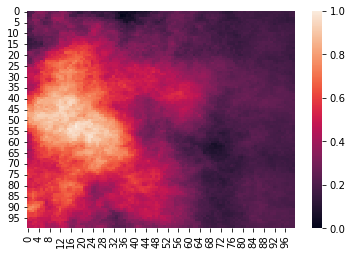

In [48]:
sns.heatmap( nonstationary_x_train[577] , linewidth=0)

# Part 2: CNN Model Training

In [38]:
# Train the CNN model that can determine whether a spatial data is stationary. 
# Input: 
#    Preprocessed data in npz format: stationary_npz_filename (stationary) and nonstationary_npz_filename (nonstationary). 
# 
#    Location for saving the CNN model: model_saving_location. 
# 
#    Split rate: split_size_stationary (stationary) and split_size_nonstationary (nonstationary). 
#                The training data will be split following the split size. 
#                For instance, when split_size_stationary = 0.8, 
#                then 80% stationary data is the training data, and the rest 20% are the test data. 
# 
# Output: 
#    Trained CNN model saved in model_saving_location. 
#    Histogram and outlines for the correct rate of the CNN training model. 

# Inputs

In [39]:
# Filename for preprocessing data (.npz format)
stationary_npz_filename = save_data_string + npzfilename_stationary
nonstationary_npz_filename = save_data_string + npzfilename_nonstationary

In [40]:
# Places for location saving
model_saving_location = 'Model_Example'

In [41]:
# Split rate for stationary data
split_size_stationary = 0.7
# Split rate for nonstationary data
split_size_nonstationary = 0.8

# Loading Data

In [42]:
# Stationary data - load npz file
npzfile = np.load(stationary_npz_filename, allow_pickle=True)
stationary_x_all = npzfile['x'] # Preprocessed data
stationary_y_all = npzfile['y'] # Stationary or nonstationary
stationary_params = npzfile['params']
print(stationary_x_all.shape)

(3428, 100, 100)


In [43]:
# Nonstationary data - load npz file
npzfile = np.load(nonstationary_npz_filename, allow_pickle=True)
tx = npzfile['x']
nonstationary_x_all = npzfile['x'] # Preprocessed data
nonstationary_y_all = npzfile['y'] # Stationary or nonstationary
nonstationary_params = npzfile['params']
print(nonstationary_x_all.shape)

(4800, 100, 100)


# Randomising and Splitting Data

In [44]:
# Split for stationary data
total_size_stationary = int(len(stationary_x_all))
training_size_stationary = int(total_size_stationary * split_size_stationary)
test_size_stationary = total_size_stationary - training_size_stationary
print(training_size_stationary)
print(test_size_stationary)

# Split for nonstationary data
total_size_nonstationary = int(len(nonstationary_x_all))
training_size_nonstationary = int(total_size_nonstationary * split_size_nonstationary)
test_size_nonstationary = total_size_nonstationary - training_size_nonstationary
print(training_size_nonstationary)
print(test_size_nonstationary)

2399
1029
3840
960


In [45]:
# Shuffler for stationary and nonstationary
random.seed(220)
shuffler_stationary = random.sample(range(total_size_stationary), total_size_stationary)
shuffler_nonstationary = random.sample(range(total_size_nonstationary), total_size_nonstationary)

In [46]:
# Shuffle data
GRID_ROWS = 100
GRID_COLS = 100
stationary_x_shuffled = stationary_x_all[shuffler_stationary, 0:GRID_ROWS, 0:GRID_COLS]
stationary_y_shuffled = stationary_y_all[shuffler_stationary]
stationary_params_shuffled = stationary_params[shuffler_stationary, ]
nonstationary_x_shuffled = nonstationary_x_all[shuffler_nonstationary, 0:GRID_ROWS, 0:GRID_COLS]
nonstationary_y_shuffled = nonstationary_y_all[shuffler_nonstationary]
nonstationary_params_shuffled = nonstationary_params[shuffler_nonstationary, ]

In [47]:
# List of shuffled file names - if someone wants copying files
# Stationary
#loc_folder = [f for f in os.listdir(directory_in_str_locs_stationary)]
#loc_folder_stationary_shuffled = [loc_folder[i] for i in shuffler_stationary]
# loc_files_stationary_shuffled = [location_file_list[i] for i in shuffler_stationary]
# z_files_stationary_shuffled = [Z_file_list[i] for i in shuffler_stationary]
# # Nonstationary
# loc_files = [f for f in os.listdir(directory_in_str_locs_nonstationary) if f.startswith(locs_string_nonstationary)]
# z_files = [f for f in os.listdir(directory_in_str_z_nonstationary) if f.startswith(z_string_nonstationary)]
# loc_files_nonstationary_shuffled = [loc_files[i] for i in shuffler_nonstationary]
# z_files_nonstationary_shuffled = [z_files[i] for i in shuffler_nonstationary]

In [48]:
# Copying files
#loc_test_stationary_copyfolder = "D:/Research2021-C/Pratik项目/0406Processed_Data/LOCS_Test_Stationary/"
#loc_test_nonstationary_copyfolder = "D:/Research2021-C/Pratik项目/0406Processed_Data/LOCS_Test_Nonstationary/"
#z_test_stationary_copyfolder = "D:/Research2021-C/Pratik项目/0406Processed_Data/Z_Test_Stationary/"
#z_test_nonstationary_copyfolder = "D:/Research2021-C/Pratik项目/0406Processed_Data/Z_Test_Nonstationary/"
#Path(loc_test_stationary_copyfolder).mkdir(parents=True, exist_ok=True)
#Path(loc_test_nonstationary_copyfolder).mkdir(parents=True, exist_ok=True)
#Path(z_test_stationary_copyfolder).mkdir(parents=True, exist_ok=True)
#Path(z_test_nonstationary_copyfolder).mkdir(parents=True, exist_ok=True)
# List of files for copying (Test data only)
#loc_test_files_stationary = loc_files_stationary_shuffled[training_size_stationary:]
#loc_test_files_nonstationary = loc_files_nonstationary_shuffled[training_size_nonstationary:]
#z_test_files_stationary = z_files_stationary_shuffled[training_size_stationary:]
#z_test_files_nonstationary = z_files_nonstationary_shuffled[training_size_nonstationary:]

In [49]:
#import shutil # copy files
# Location files for stationary data
#for i in tqdm(range(len(loc_test_files_stationary))):
    # Get paired location and observation files
    #loc_text = loc_test_files_stationary[i]
    #loc_old_name = directory_in_str_locs_stationary + loc_text 
    #loc_new_name = loc_test_stationary_copyfolder + loc_text 
    # Copy
    #shutil.copy(loc_old_name, loc_new_name)

In [50]:
# Z files for stationary data
#for i in tqdm(range(len(z_test_files_stationary))):
    # Get paired location and observation files
    #z_text = z_test_files_stationary[i]
    #z_old_name = directory_in_str_z_stationary + z_text 
    #z_new_name = z_test_stationary_copyfolder + z_text 
    # Copy
    #shutil.copy(z_old_name, z_new_name)

In [51]:
# Location files for nonstationary data
#for i in tqdm(range(len(loc_test_files_nonstationary))):
    # Get paired location and observation files
    #loc_text = loc_test_files_nonstationary[i]
    #loc_old_name = directory_in_str_locs_nonstationary + loc_text 
    #loc_new_name = loc_test_nonstationary_copyfolder + loc_text 
    # Copy
    #shutil.copy(loc_old_name, loc_new_name)

In [52]:
# Z files for nonstationary data
#for i in tqdm(range(len(z_test_files_nonstationary))):
    # Get paired location and observation files
    #z_text = z_test_files_nonstationary[i]
    #z_old_name = directory_in_str_z_nonstationary + z_text 
    #z_new_name = z_test_nonstationary_copyfolder + z_text 
    # Copy
    #shutil.copy(z_old_name, z_new_name)

In [53]:
# Training data
stationary_x_train = stationary_x_shuffled[0:training_size_stationary, 0:GRID_ROWS, 0:GRID_COLS]
stationary_y_train = stationary_y_shuffled[0:training_size_stationary]
stationary_params_train = stationary_params_shuffled[0:training_size_stationary, ]
nonstationary_x_train = nonstationary_x_shuffled[0:training_size_nonstationary, 0:GRID_ROWS, 0:GRID_COLS]
nonstationary_y_train = nonstationary_y_shuffled[0:training_size_nonstationary]
nonstationary_params_train = nonstationary_params_shuffled[0:training_size_nonstationary, ]
# Test data
stationary_x_test = stationary_x_shuffled[training_size_stationary:, 0:GRID_ROWS, 0:GRID_COLS]
stationary_y_test = stationary_y_shuffled[training_size_stationary:]
stationary_params_test = stationary_params_shuffled[training_size_stationary:, ]
nonstationary_x_test = nonstationary_x_shuffled[training_size_nonstationary:, 0:GRID_ROWS, 0:GRID_COLS]
nonstationary_y_test = nonstationary_y_shuffled[training_size_nonstationary:]
nonstationary_params_test = nonstationary_params_shuffled[training_size_nonstationary:, ]
# Combine
x_train = np.concatenate((stationary_x_train,nonstationary_x_train))
y_train = np.concatenate((stationary_y_train,nonstationary_y_train))
params_train = np.concatenate((stationary_params_train,nonstationary_params_train))
x_test = np.concatenate((stationary_x_test,nonstationary_x_test))
y_test = np.concatenate((stationary_y_test,nonstationary_y_test))
params_test = np.concatenate((stationary_params_test,nonstationary_params_test))

In [55]:
x_train.shape


(6239, 100, 100)

In [56]:
# Add a channels dimension
# x_train = x_train[..., tf.newaxis].astype("float32")
# x_test = x_test[..., tf.newaxis].astype("float32")
x_train = x_train.reshape(6239, 100, 100, 1)
x_test = x_test.reshape(1989, 100, 100, 1)

In [57]:
print(x_train.shape)
print(x_test.shape)

(6239, 100, 100, 1)
(1989, 100, 100, 1)


In [58]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
y_test.shape

(1989, 2)

# Start training model

In [60]:
training_size = x_train.shape[0]
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(training_size).batch(256)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(256)

2023-03-29 16:23:19.623296: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-29 16:23:19.630287: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-29 16:23:19.751231: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:b2:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-03-29 16:23:19.751283: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-29 16:23:19.881668: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-03-29 16:23:19.881822: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2

In [61]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


# Model

In [62]:
#create model

# model = Sequential()
# #add model layers
# # model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(100, 100, 1)))
# model.add(Conv2D(32, kernel_size=3, activation="relu"))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(2, activation='softmax'))

In [63]:
#compile model using accuracy to measure model performance
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
#train the model
# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size = 128, verbose = 2)

In [65]:
# y_test

In [66]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(2, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

# Categorical Cross entropy loss to for classification
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# Adaptive Learning rate
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

# Gradient Descent
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed when a more complex architecture
    # is implemented
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

# test_ds

EPOCHS = 20 # Original: epochs = 25. 

#training_seed = 1001 # Suhas training
#random.seed(training_seed)
#tf.random.set_seed(training_seed) # Random seed doesn't work? 
for epoch in range(EPOCHS):
#     print(epoch)
  # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
#     print(epoch)
    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    print(
         f'Epoch {epoch + 1}, '
         f'Loss: {train_loss.result()}, '
         f'Accuracy: {train_accuracy.result() * 100}, '
         f'Test Loss: {test_loss.result()}, '
         f'Test Accuracy: {test_accuracy.result() * 100}'
         )

2023-03-29 16:23:52.471565: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-29 16:23:52.474933: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz
2023-03-29 16:23:52.740737: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-03-29 16:23:54.658020: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-03-29 16:23:54.704841: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


Epoch 1, Loss: 3.304684638977051, Accuracy: 62.09328079223633, Test Loss: 0.6137932538986206, Test Accuracy: 68.12468719482422
Epoch 2, Loss: 0.6141421794891357, Accuracy: 72.22311401367188, Test Loss: 0.522335946559906, Test Accuracy: 82.75515747070312
Epoch 3, Loss: 0.5081920027732849, Accuracy: 84.58086395263672, Test Loss: 0.40589988231658936, Test Accuracy: 89.2408218383789
Epoch 4, Loss: 0.2329639494419098, Accuracy: 90.7036361694336, Test Loss: 0.1603361815214157, Test Accuracy: 91.25188446044922
Epoch 5, Loss: 0.09757588058710098, Accuracy: 93.04375457763672, Test Loss: 0.08673006296157837, Test Accuracy: 91.45299530029297
Epoch 6, Loss: 0.0730970948934555, Accuracy: 93.30020904541016, Test Loss: 0.07660165429115295, Test Accuracy: 91.55354309082031
Epoch 7, Loss: 0.06429833173751831, Accuracy: 93.41240692138672, Test Loss: 0.07124018669128418, Test Accuracy: 91.55354309082031
Epoch 8, Loss: 0.05881090462207794, Accuracy: 93.46048736572266, Test Loss: 0.06839580833911896, Test 

In [67]:
# Summary of the model

model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  39338112  
_________________________________________________________________
dense_1 (Dense)              multiple                  258       
Total params: 39,338,690
Trainable params: 39,338,690
Non-trainable params: 0
_________________________________________________________________


In [68]:
# model.save("my_model")
model.save(model_saving_location, save_format='tf')

2023-03-29 16:26:28.554035: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Model_Example/assets


In [69]:
model_saving_location


'Model_Example'

In [70]:
model_saving_location

'Model_Example'

# Model testing

In [68]:
# Folder places and filenames
# Stationary
directory_in_str_locs_stationary = "real_data/"
directory_in_str_z_stationary = "real_data/"
locs_string_stationary = "LOC_" # LOC_3600_sample_1.txt, LOC_3600_sample_2.txt, ...
z_string_stationary = "Z_" # Z_3600_sample_1.txt, Z_3600_sample_2.txt, ...



# Initialization 
directory_in_str_locs = directory_in_str_locs_stationary
directory_in_str_z = directory_in_str_z_stationary
locs_string = locs_string_stationary
z_string = z_string_stationary

directory_locs = os.fsencode(directory_in_str_locs)
data_folder1_locs = os.listdir(directory_locs)

location_file_list = []
Z_file_list = []
for path, subdirs, files in os.walk(directory_locs):
    for name in files:
        name_string = name.decode("utf-8")
        if name_string.startswith(locs_string): 
            location_file_path = os.path.join(path, name)
            location_file_path = location_file_path.decode("utf-8")
            z_file_path = location_file_path.replace(locs_string, z_string, 1)
            location_file_list.append(location_file_path)
            Z_file_list.append(z_file_path)

# loc_files is the file name for plotting. 
loc_files = []
for i in range(len(location_file_list)): 
    replace_res = location_file_list[i].replace(directory_in_str_locs, "")
    replace_res = replace_res.replace("\\", "_")
    loc_files.append(replace_res)

# Grid row and column
GRID_ROWS = 100
GRID_COLS = 100

# Initialization continued
ndata = len(location_file_list)
#ndata = 100 # Test
stationary_x_test = np.zeros((ndata,GRID_COLS,GRID_ROWS))

stationary_y_test = np.zeros(ndata) # Zero = the model is stationary. One = nonstationary. 

# Initialization continued
param_val_is_stat = 1;
npzfilename = npzfilename_stationary;

# Initialization continued
npzfilename = npzfilename_nonstationary;

# Initialization continued
param_is_stat = np.ones(ndata)
#param_samplenum.fill(param_val_samplenum)
param_is_stat.fill(param_val_is_stat)

param_list = []

# Main program for data preprocessing
for i_folder in tqdm(range(ndata)):
    # Append the parameter to samples. 
    param_dict = {
        "sample": i_folder,
        "is_stat": param_val_is_stat
    }
    param_list.append(param_dict)
    #==========
    # Data extraction
    #===========
    # Get location and observation files for each subsample
    loc_text = location_file_list[i_folder]
    z_text = Z_file_list[i_folder]
    # Load the location and z files
    location_file = open(loc_text)
    Z_value_file = open(z_text)
#     print(location_file)
    locations = np.loadtxt(location_file, delimiter=',')
    Z_values = np.loadtxt(Z_value_file, delimiter=',')
    #==========
    # End of data extraction
    #==========
    # Compute the output grid
    output_arr = np.zeros((GRID_ROWS,GRID_COLS))
    grid_sum_arr = np.zeros((GRID_ROWS,GRID_COLS))
    grid_div_arr = np.zeros((GRID_ROWS,GRID_COLS))
    if manual_range_locs == False:
        # Start and end locations (Auto)
#         print(locations[:,0],locations[:,1])
        startx = min(locations[:, 0])
        starty = min(locations[:, 1])
        endx = max(locations[:, 0])
        endy = max(locations[:, 1])
#     print(locations)
    locations[:,0] = (locations[:, 0] - startx)/(endx - startx)
    locations[:,1] = (locations[:, 1] - starty)/(endy - starty)
#     print(locations)
    
    X = np.linspace(0, 1,GRID_COLS)
    Y = np.linspace(0, 1,GRID_ROWS)
    X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
    interp = NearestNDInterpolator(locations, Z_values)
    Z = interp(X, Y)
#     break
#     # Get the summation and division
#     for j in range(locations.shape[0]):
#         # Get the grid locations (x, y). Result: [y][x], because x is column (x=0 is the first column). 
#         x = int(math.floor((locations[j][0] - startx) * GRID_COLS / (endx - startx)))
#         y = int(math.floor((locations[j][1] - starty) * GRID_ROWS / (endy - starty)))
#         # For boundary value problems
#         x = min(x, GRID_COLS - 1)
#         y = min(y, GRID_ROWS - 1)
#         val = Z_values[j]
#         # Add the summation and division
#         grid_sum_arr[y][x] = grid_sum_arr[y][x] + val
#         grid_div_arr[y][x] += 1
#     # Generate output
#     for j1 in range(GRID_ROWS):
#         for j2 in range(GRID_COLS):
#             if grid_div_arr[j1][j2] > 0:
#                 # Mean value in a cell
#                 output_arr[j1][j2] += (grid_sum_arr[j1][j2] / grid_div_arr[j1][j2])
#             else:
#                 # Mean value over all regions if the cell has no locations
#                 output_arr[j1][j2] += np.mean(Z_values)
    if manual_range_z == False:
        # Normalize (Auto)
        m = np.min(Z)
        M = np.max(Z)
    if m == M:
        output_arr = np.ones((GRID_ROWS,GRID_COLS)) * 0.5 # All 0.5
    else: 
        # Range from 0 to 1. 
        Z = (Z - m) / (M - m)
    # Save results
    stationary_x_test[i_folder] = Z

100%|██████████| 5/5 [00:01<00:00,  2.54it/s]


In [69]:
# sns.heatmap( stationary_x_test[0] , linewidth=0)
Z_file_list[1]

'real_data/Z_0.csv'

In [70]:
stationary_x_test.shape

(5, 100, 100)

In [71]:
stationary_x_test = stationary_x_test.reshape(5,100,100,1)

In [52]:
testing_x = x_test
testing_y = y_test

In [73]:
# Label for histogram about training and testing data. 
training_label = "Pratik"
test_label = "Pratik"

In [74]:
# # Testing - probability of stationarity
# test_input = testing_x
# prediction = model.predict(test_input)
# test_accuracy.reset_state()
# tacc = test_accuracy(testing_y,prediction)

In [71]:
prediction = model.predict(x_test)
# probabilities = tf.keras.activations.softmax (tf.convert_to_tensor(prediction))

In [102]:
prediction

array([[9.9983513e-01, 1.6484289e-04],
       [9.9994135e-01, 5.8668033e-05],
       [9.9995279e-01, 4.7230002e-05],
       ...,
       [2.2351567e-04, 9.9977654e-01],
       [1.4814673e-02, 9.8518538e-01],
       [1.6031556e-05, 9.9998403e-01]], dtype=float32)

In [73]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [93]:
probnonstat_all = np.array(prediction[:, 1])

In [94]:
y_test.shape

(1989, 2)

In [95]:
probnonstat_stationary = probnonstat_all[np.where(y_test[:,1]==0)]
probnonstat_nonstationary = probnonstat_all[np.where(y_test[:,1]==1)]

In [58]:
# df = pd.DataFrame()

# df["stationary_probability"] = probnonstat_stationary
# df.to_csv("stationary_probability.csv",index=False)

NameError: name 'pd' is not defined

In [88]:
y_test[:,1]

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

# Histogram of the stationarity index 

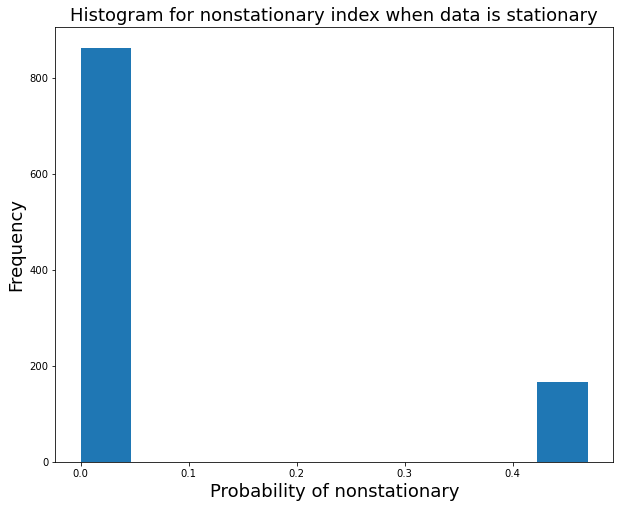

In [100]:
# Histogram of stationarity index (probability that the data is stationary), for stationary testing data. 
plt.figure(figsize=(10,8))
plt.title("Histogram for nonstationary index when data is stationary", fontsize=18)
plt.xlabel("Probability of nonstationary", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.hist(probnonstat_stationary)
plt.savefig("stationary_prob.pdf")

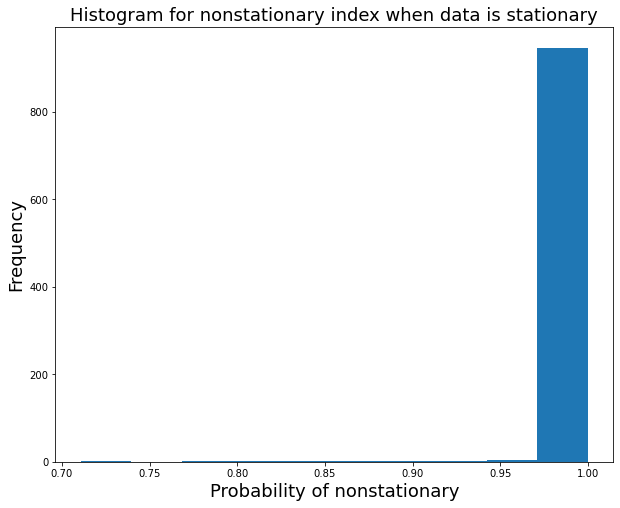

In [101]:
# Histogram of stationarity index (probability that the data is stationary), for nonstatoinary testing data. 
plt.figure(figsize=(10,8))
plt.title("Histogram for nonstationary index when data is stationary", fontsize=18)
plt.xlabel("Probability of nonstationary", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.hist(probnonstat_nonstationary)
plt.savefig("nonstationary_prob.pdf")

# Outline of classification results for test data

In [ ]:
# Result of correct determination
prediction_labels = tf.argmax(prediction , 1).numpy()

In [ ]:
conf_matrix = tf.math.confusion_matrix(tf.convert_to_tensor(testing_y) , tf.convert_to_tensor(prediction_labels))
#print(conf_matrix_pratik)

# Identifying the type of error (Type I or Type II) 

true_negatives = conf_matrix[0][0].numpy()
true_positives = conf_matrix[1][1].numpy()
false_negatives = conf_matrix[1][0].numpy()
false_positives = conf_matrix[0][1].numpy()

tf.print("TN = " , true_negatives) # Negative = stationary
tf.print("TP = " , true_positives) # Positive = nonstationary
tf.print("FN = " , false_negatives)
tf.print("FP = " , false_positives)

TN =  601
TP =  152
FN =  0
FP =  4


In [ ]:
correct_stationary = true_negatives / (true_negatives + false_positives)
correct_nonstationary = true_positives / (true_positives + false_negatives)
print("Number of stationary testing samples: ", true_negatives + false_positives, "; of which correct identifications:", true_negatives)
print("Correct stationary = ", correct_stationary)
print("Number of nonstationary testing samples: ", true_positives + false_negatives, "; of which correct identifications:", true_positives)
print("Correct nonstationary = ", correct_nonstationary)

Number of stationary testing samples:  605 ; of which correct identifications: 601
Correct stationary =  0.9933884297520661
Number of nonstationary testing samples:  152 ; of which correct identifications: 152
Correct nonstationary =  1.0
